# Insight Data Challenge

In [10]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import make_scorer, confusion_matrix
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import accuracy_score,  roc_curve, auc

from scipy import interp

sns.set_style('whitegrid')

# The following line is needed to show plots inline in notebooks
%matplotlib inline 

In [2]:
features = ['radius','texture','perimeter','area',
                'smoothness','compactness','concavity',
                'concave_points','symmetry','fractal_dimension']

In [3]:
bcw_columns = ['id','clump_thickness','cell_size_uniformity',
           'cell_shape_uniformity','marginal_adhesion',
           'single_epithelial_cell_size',
           'bare_nuclei','bland_chromatin',
           'normal_nuclei','mitoses','class']

In [ ]:
bcwDF = pd.read_csv('data/raw/breast-cancer-wisconsin.data', names=bcw_columns)
bcwDF.head()

In [8]:
bcwDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
id                             699 non-null int64
clump_thickness                699 non-null int64
cell_size_uniformity           699 non-null int64
cell_shape_uniformity          699 non-null int64
marginal_adhesion              699 non-null int64
single_epithelial_cell_size    699 non-null int64
bare_nuclei                    699 non-null object
bland_chromatin                699 non-null int64
normal_nuclei                  699 non-null int64
mitoses                        699 non-null int64
class                          699 non-null int64
dtypes: int64(10), object(1)
memory usage: 60.1+ KB


In [9]:
bcwDF.describe()

,id,clump_thickness,cell_size_uniformity,cell_shape_uniformity,marginal_adhesion,single_epithelial_cell_size,bland_chromatin,normal_nuclei,mitoses,class
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,3.437768,2.866953,1.589413,2.689557
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,2.438364,3.053634,1.715078,0.951273
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


LinAlgError: singular matrix

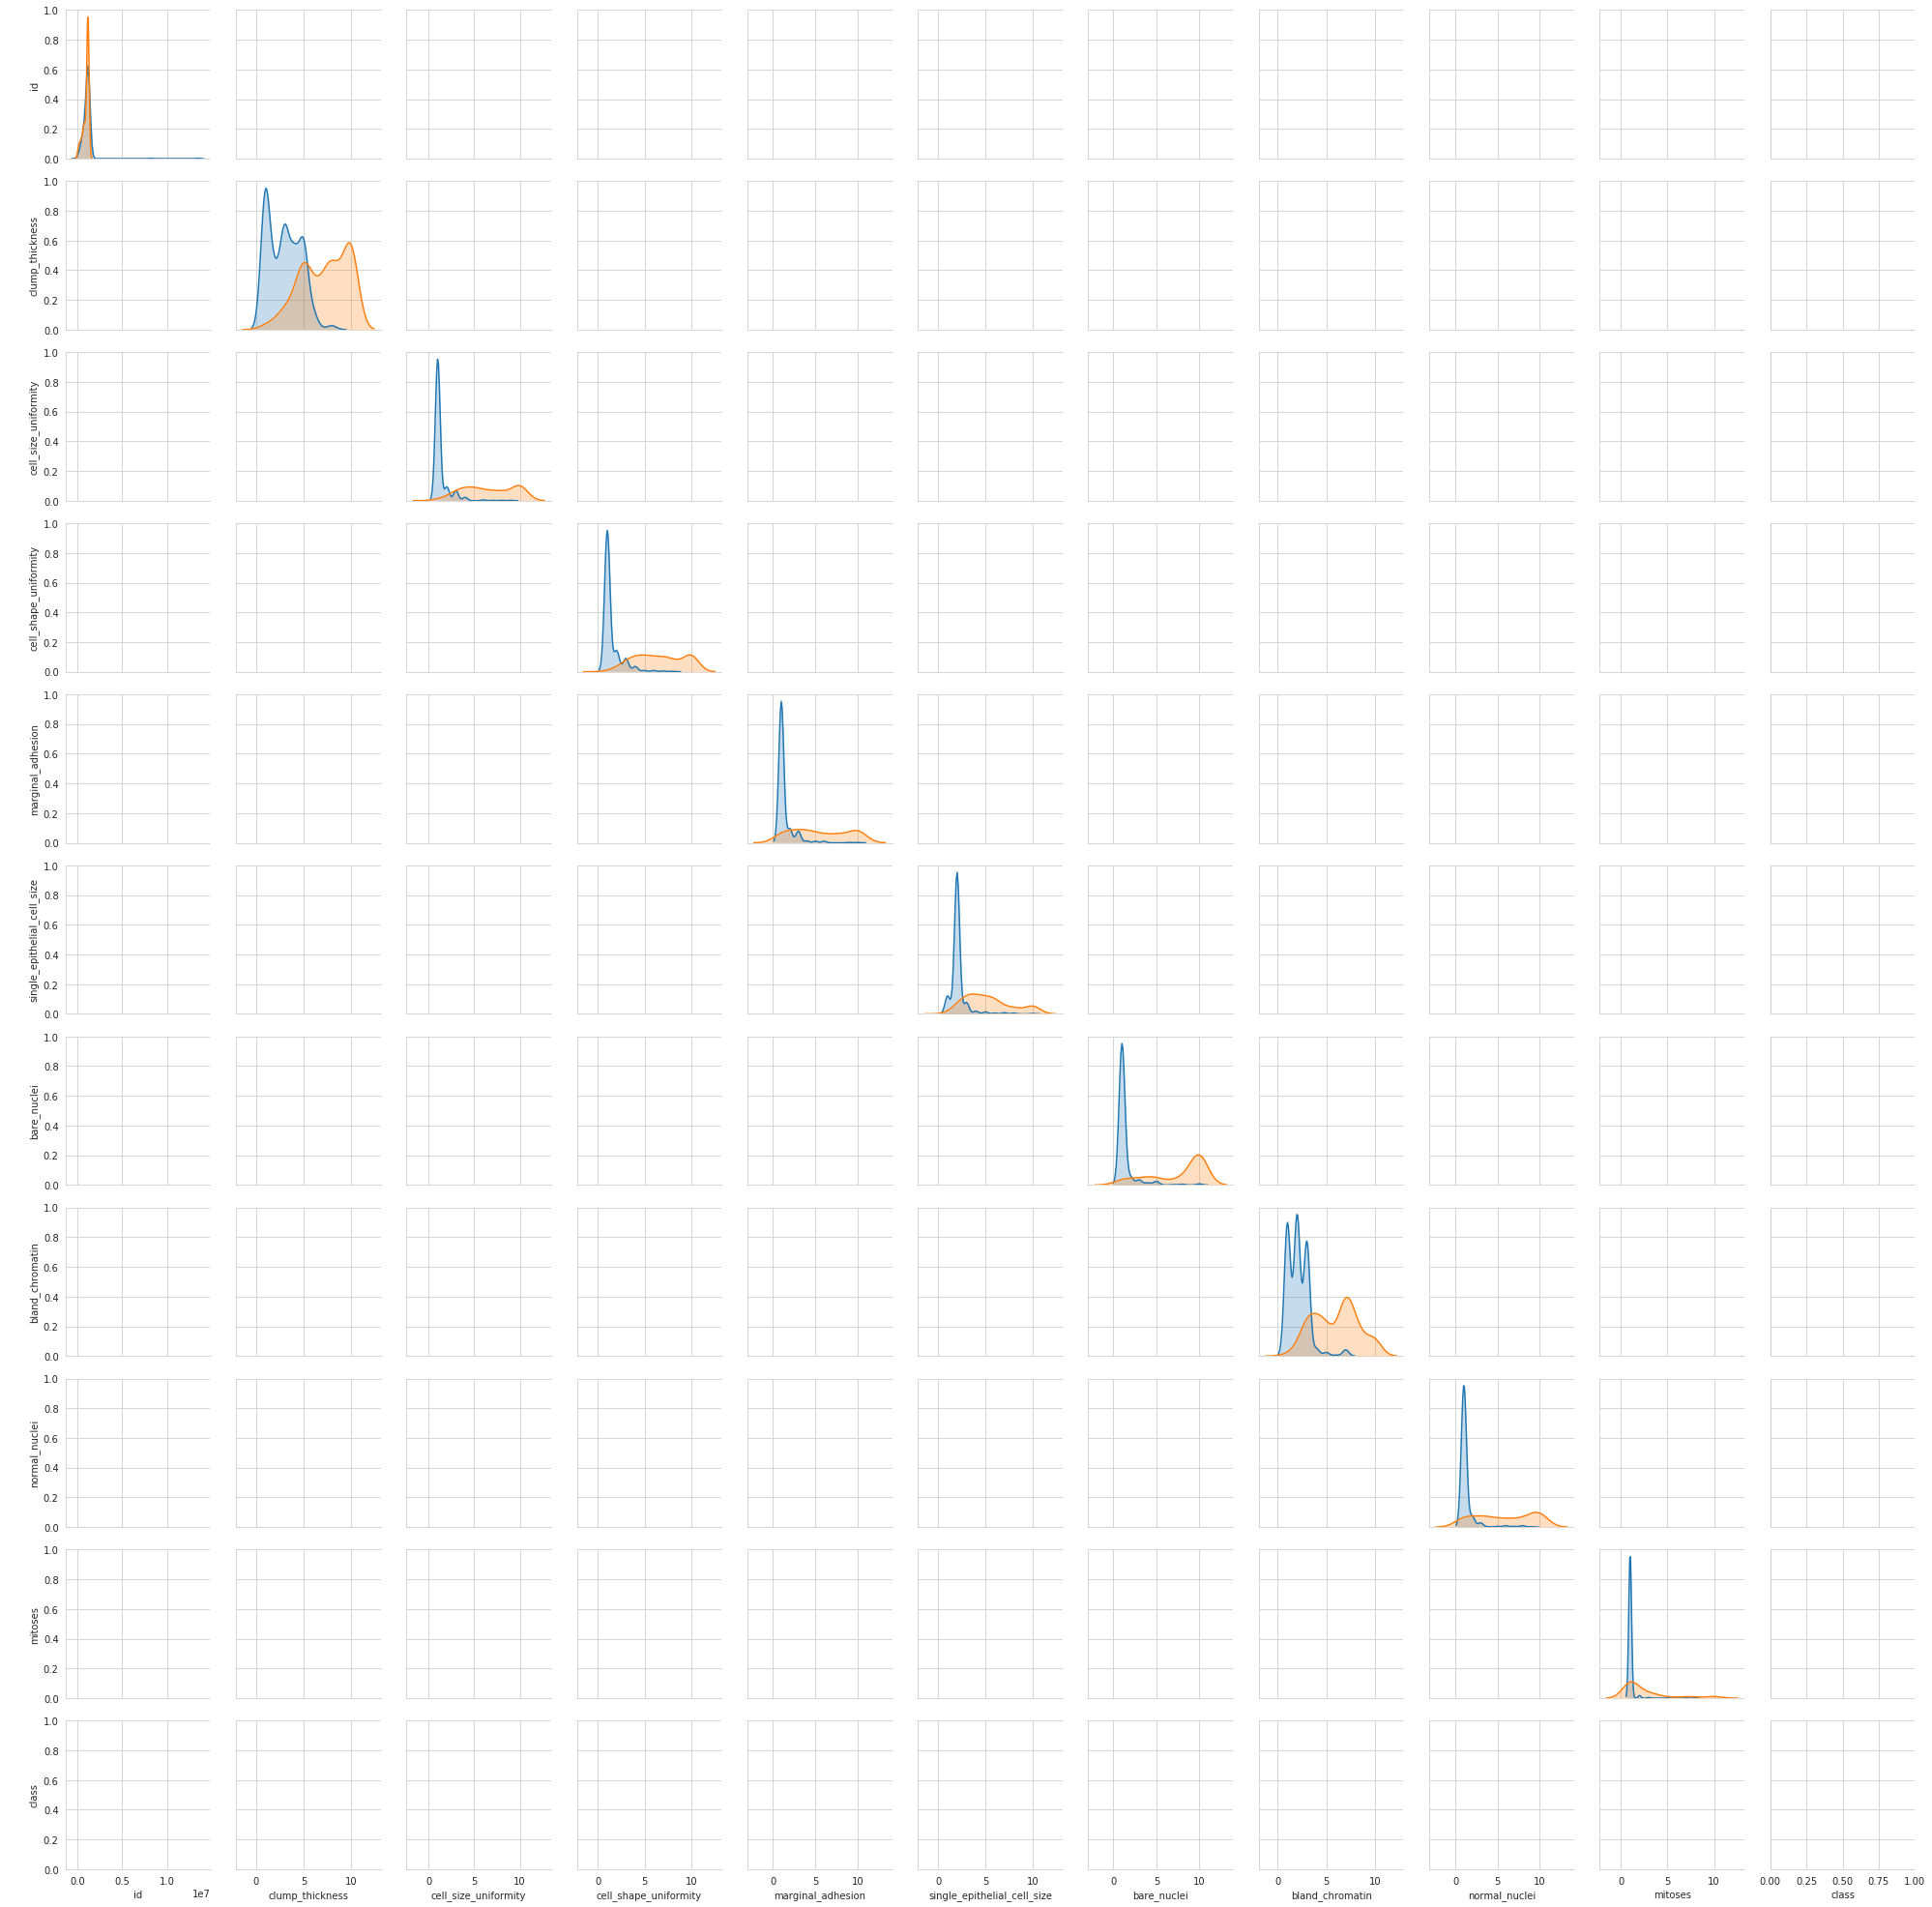

In [36]:
sns.pairplot(bcwDF,hue='class')

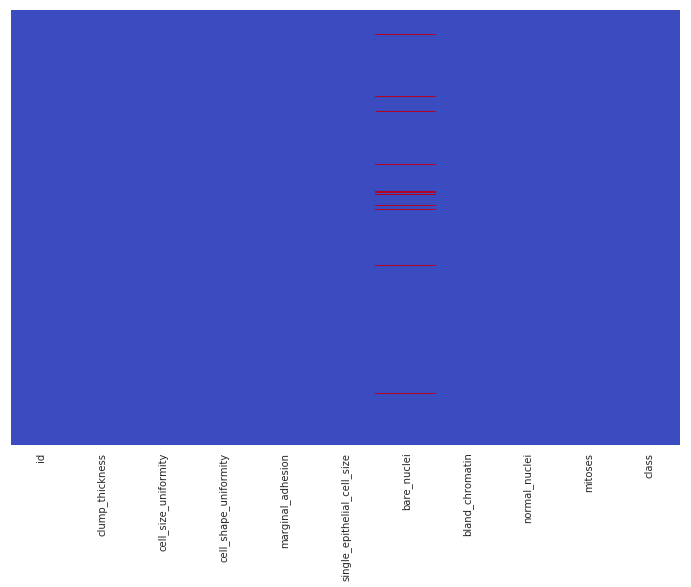

In [15]:
fig, ax = plt.subplots(figsize=(12,8))
sns.heatmap(bcwDF == '?', cmap='coolwarm', yticklabels=False,cbar=False,ax=ax)

In [23]:
 nans = bcwDF[bcwDF['bare_nuclei'] == '?']

In [24]:
len(nans)

16

In [26]:
len(nans)/len(bcwDF)*100.0

2.28898426323319

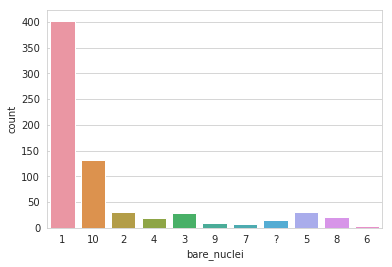

In [27]:
sns.countplot(bcwDF['bare_nuclei'])

In [29]:
bcwDF['bare_nuclei'].value_counts().head()

1     402
10    132
2      30
5      30
3      28
Name: bare_nuclei, dtype: int64

In [30]:
bcwDF['bare_nuclei'].value_counts().head() / len(bcwDF)

1     0.575107
10    0.188841
2     0.042918
5     0.042918
3     0.040057
Name: bare_nuclei, dtype: float64

In [31]:
bcwDF.set_value(bcwDF['bare_nuclei'] == '?', 'bare_nuclei', 1)

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  """Entry point for launching an IPython kernel.


,id,clump_thickness,cell_size_uniformity,cell_shape_uniformity,marginal_adhesion,single_epithelial_cell_size,bare_nuclei,bland_chromatin,normal_nuclei,mitoses,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
5,1017122,8,10,10,8,7,10,9,7,1,4
6,1018099,1,1,1,1,2,10,3,1,1,2
7,1018561,2,1,2,1,2,1,3,1,1,2
8,1033078,2,1,1,1,2,1,1,1,5,2
9,1033078,4,2,1,1,2,1,2,1,1,2


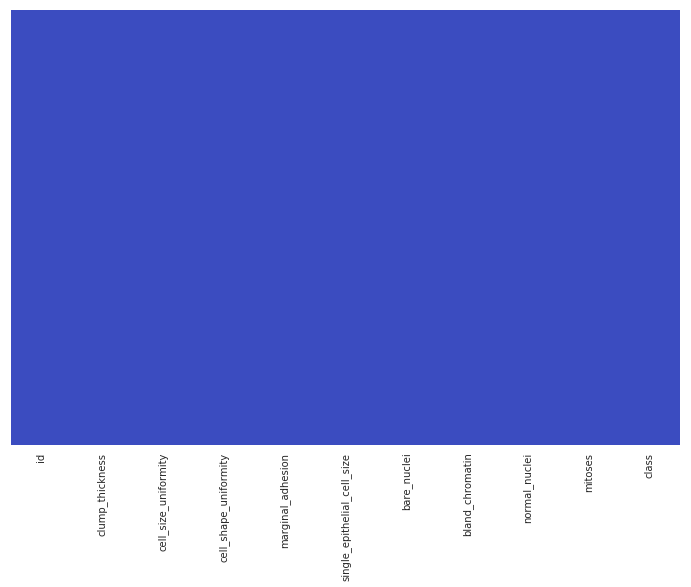

In [32]:
fig, ax = plt.subplots(figsize=(12,8))
sns.heatmap(bcwDF == '?', cmap='coolwarm', yticklabels=False,cbar=False,ax=ax)

In [35]:
np.sum(bcwDF == '?')

id                             0
clump_thickness                0
cell_size_uniformity           0
cell_shape_uniformity          0
marginal_adhesion              0
single_epithelial_cell_size    0
bare_nuclei                    0
bland_chromatin                0
normal_nuclei                  0
mitoses                        0
class                          0
dtype: int64

In [ ]:
sns.kdeplot()

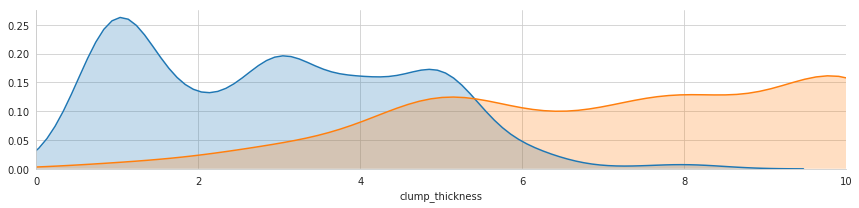

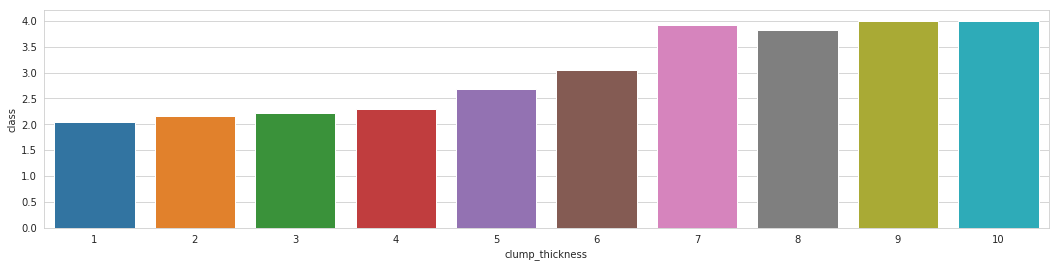

In [44]:
facet = sns.FacetGrid(bcwDF, hue='class', aspect=4)
facet.map(sns.kdeplot, 'clump_thickness', shade=True)
facet.set(xlim=(0, bcwDF['clump_thickness'].max()))

fig, ax = plt.subplots(1,1,figsize=(18,4))

ct_mean = bcwDF[['clump_thickness','class']].groupby(['clump_thickness'],as_index=False).mean()

sns.barplot(x='clump_thickness', y='class', data=ct_mean)

In [ ]:
facet = sns.FacetGrid(bcwDF, hue='class', aspect=4)
facet.map(sns.kdeplot, 'cell', shade=True)
facet.set(xlim=(0, bcwDF['clump_thickness'].max()))

fig, ax = plt.subplots(1,1,figsize=(18,4))

ct_mean = bcwDF[['clump_thickness','class']].groupby(['clump_thickness'],as_index=False).mean()

sns.barplot(x='clump_thickness', y='class', data=ct_mean)

In [48]:
bcwDF.columns.values

array(['id', 'clump_thickness', 'cell_size_uniformity',
       'cell_shape_uniformity', 'marginal_adhesion',
       'single_epithelial_cell_size', 'bare_nuclei', 'bland_chromatin',
       'normal_nuclei', 'mitoses', 'class'], dtype=object)

In [49]:
bcwDF = bcwDF.drop('id',axis=1)

In [55]:
for col in bcwDF.columns.values:
    print(col, bcwDF[col].nunique())

clump_thickness 10
cell_size_uniformity 10
cell_shape_uniformity 10
marginal_adhesion 10
single_epithelial_cell_size 10
bare_nuclei 11
bland_chromatin 10
normal_nuclei 10
mitoses 9
class 2


In [70]:
X = bcwDF.drop(['class'],axis=1).astype(float)
y = bcwDF['class']

In [89]:
bcwDF['class'] = bcwDF['class'].apply(lambda x: 1 if x == 4 else 0)

In [91]:
resultDF = pd.DataFrame(columns=['model','hyperparams','train_acc','train_std','test_acc','test_std'])
df_idx = 0

In [92]:
models = {
    'knn': KNeighborsClassifier(),
    'log': LogisticRegression(solver='lbfgs'),
    'dt': DecisionTreeClassifier(),
    'rf': RandomForestClassifier(),
    'ab': AdaBoostClassifier()
}

In [93]:
def crossValidate(typ, model, X, y, hyperparams='default', verbose=0):
    global df_idx
    
    # Update model hyperparameters if given
    if hyperparams is not 'default':
        model.set_params(**hyperparams)
    
    # Initialize scaler class
    scaler = StandardScaler()
    
    # Get kFolds
    kfold = KFold(n_splits=10)
    kfold.get_n_splits(X)

    # Initialize storage vectors
    trainACC = np.zeros(10)
    testACC = np.zeros(10)
    np_idx = 0

    # Loop through folds
    for train_idx, test_idx in kfold.split(X):
        X_train, X_test = X.values[train_idx], X.values[test_idx]
        y_train, y_test = y.values[train_idx], y.values[test_idx]

        # Scale data
        X_train = scaler.fit_transform(X_train)
        X_test = scaler.transform(X_test)

        # Fit to training set
        model.fit(X_train, y_train)

        # Make predictions on testing set
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)
        
        # Compute training and testing accuracy
        trainACC[np_idx] = accuracy_score(y_train, y_train_pred)*100
        testACC[np_idx] = accuracy_score(y_test, y_test_pred)*100
        np_idx += 1
        
        # Print fold accuracy if verbose level 2
        if verbose == 2:
            print ("    Fold {}: Accuracy: {}%".format(np_idx, round(testACC[-1],3)))   

    # Print average accuracy if verbose level 1
    if verbose == 1:
        print ("  Average Score: {}%({}%)".format(round(np.mean(testACC),3),round(np.std(testACC),3)))
    
    # Update dataframe
    resultDF.loc[df_idx, 'model'] = typ
    resultDF.loc[df_idx, 'hyperparams'] = str(hyperparams)
    resultDF.loc[df_idx, 'train_acc'] = trainACC.mean()
    resultDF.loc[df_idx, 'train_std'] = trainACC.std()
    resultDF.loc[df_idx, 'test_acc'] = testACC.mean()
    resultDF.loc[df_idx, 'test_std'] = testACC.std()
    df_idx += 1                                         
                                         
    # Return average testing accuracy, and fitted model
    return testACC.mean(), model

In [94]:
for name, m in models.items():
    print ("Fitting " + name + " model")
    _, models[name] = crossValidate(name, m, X, y, 'default', 1)

Fitting dt model
  Average Score: 92.137%(5.077%)
Fitting log model
  Average Score: 96.429%(3.455%)
Fitting knn model
  Average Score: 96.284%(3.999%)
Fitting rf model
  Average Score: 96.286%(3.569%)
Fitting ab model


/usr/local/lib/python3.5/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


  Average Score: 95.284%(4.041%)


In [95]:
resultDF = resultDF.sort_values('test_acc',ascending=False).reset_index(drop=True)
resultDF.groupby('model').first().sort_values('test_acc',ascending=False)

,hyperparams,train_acc,train_std,test_acc,test_std
model,,,,,
log,default,96.868600,0.449503,96.428571,3.455253
rf,default,99.713882,0.171220,96.285714,3.568570
knn,default,97.329573,0.387696,96.283644,3.998822
ab,default,98.601282,0.501305,95.283644,4.041457
dt,default,100.000000,0.000000,92.136646,5.076643


In [96]:
def plot_roc_curve(name, model, X, y):
    # Initialize scaler
    scaler = StandardScaler()
    
    # Get kfolds
    kfold = KFold(n_splits=10)
    kfold.get_n_splits(X)

    # Initalize storage lists
    tprs = []
    aucs = []
    mean_fpr = np.linspace(0, 1, 100)
    
    i = 0
    # Loop through folds
    for train_idx, test_idx in kfold.split(X):
        # Split data
        X_train, X_test = X.values[train_idx], X.values[test_idx]
        y_train, y_test = y.values[train_idx], y.values[test_idx]

        # Scale data
        X_train = scaler.fit_transform(X_train)
        X_test = scaler.transform(X_test)

        # Fit model to fold
        model.fit(X_train, y_train)
        
        # Get probabilities for X_test
        y_test_proba = model.predict_proba(X_test)
        
        # Get FPR, TPR, and AUC vals based on probabilities
        fpr, tpr, _ = roc_curve(y_test, y_test_proba[:,1])
        roc_auc = auc(fpr, tpr)
        
        # Append tpr and auc
        tprs.append(interp(mean_fpr, fpr, tpr))
        tprs[-1][0] = 0.0
        aucs.append(roc_auc)
     
        # Plot roc for fold
        plt.plot(fpr, tpr, lw=1, alpha=0.3,
             label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
        
        i += 1
    
    # Plot random guessing line
    plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
         label='Chance', alpha=.8)
    
    # Get mean tpr and mean/std for auc
    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)
    
    # Plot mean curve
    plt.plot(mean_fpr, mean_tpr, color='b',
             label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
             lw=2, alpha=.8)
    
    # Fill area between plots
    std_tpr = np.std(tprs, axis=0)
    tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
    tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
    plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                     label=r'$\pm$ 1 std. dev.')
    
    # style
    plt.xlim([-0.05, 1.05])
    plt.ylim([-0.05, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(name + ' Receiver operating characteristic curve')
    plt.legend(loc="lower right")
    
    return mean_fpr, mean_tpr, mean_auc, std_auc

/usr/local/lib/python3.5/dist-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "
/usr/local/lib/python3.5/dist-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "
/usr/local/lib/python3.5/dist-packages/matplotlib/figure.py:98: MatplotlibDeprecationW

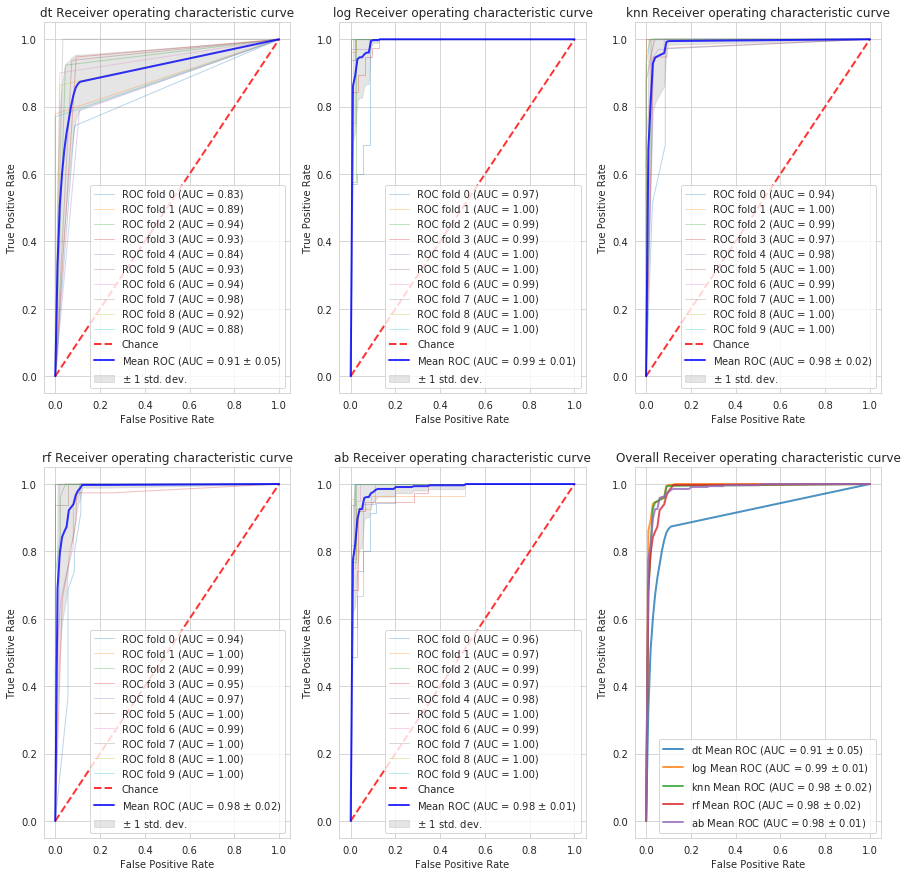

In [97]:
plt_id = 1
plt.figure(figsize=(15,15))
for name, m in models.items():
    ax = plt.subplot(2,3,plt_id)

    fpr, tpr, auc_mean, auc_std = plot_roc_curve(name, m, X, y)
    plt_id+=1
    
    ax = plt.subplot(2,3,6)
    plt.plot(fpr, tpr, label=name + r' Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (auc_mean, auc_std),
             lw=2, alpha=.8)

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Overall Receiver operating characteristic curve')
plt.legend(loc="lower right")

In [ ]:
def gridSearch(name, models, param_grids, X, y, num_trials=100, verbose=0):
    # Get model and param grid
    model = models[name]
    current_param_grid = param_grids[name]
    
    # Create variable to store best model
    best_model = model    
    
    # Loop through trials
    for nTrial in range(num_trials):
        if verbose == 2 and nTrial % 10 == 0:
            print ('  Trial: %d' % (nTrial))
            
        # Get current best accuracy for model from the results dataframe
        best_acc = resultDF[resultDF['model'] == name]['test_acc'].max()
        
        # Randomly select params from grid
        params = {}
        for k, v in current_param_grid.items():
            params[k] = np.random.choice(v)
        
        # Cross validate model with selected hyperparams using the function we generated earlier
        acc,model = crossValidate(name, model, X, y, params, 0)
                
        # Update best model if it satisfies our optimizing metric
        if acc > best_acc:
            if verbose == 1:
                print ('    New best ' +  name + ' model: ' + str(acc))
            best_model = model
    # Return best model
    return best_model

In [ ]:
param_grids = {}
param_grids['knn'] = {"n_neighbors": np.arange(1,11,1)}
param_grids['log'] = {'C': [0.001,0.01,0.1,1,10,100],
                      'solver':['newton-cg','lbfgs','liblinear','sag']}
param_grids['dt'] = {'criterion': ['gini','entropy'],
                     'max_depth': np.arange(1,6,1),
                     'min_samples_split': np.arange(3,10,1),
                     'max_features': np.arange(1,6,1)
                     }
param_grids['rf'] =  {'n_estimators': [int(x) for x in np.arange(10,200,10)],
                      'max_features': ['auto','sqrt','log2'],
                      'max_depth': [int(x) for x in np.arange(1,5)] + [None],
                      'min_samples_split': [2,5,10],
                      'min_samples_leaf': [1,2,4],
                      'bootstrap': [True,False]
                      }
param_grids['ab'] = {'n_estimators': [int(x) for x in np.arange(10,200,10)],
                    'learning_rate': [0.01,0.1,1,2]}

In [ ]:
for name in models.keys():
    print (name)
    models[name] = gridSearch(name, models, param_grids, X, y, 50, 1)

In [ ]:
resultDF = resultDF.sort_values('test_acc',ascending=False).reset_index(drop=True)
resultDF.groupby('model').first().sort_values('test_acc',ascending=False)

In [ ]:
plt_id = 1
plt.figure(figsize=(15,15))
for name, m in models.items():
    ax = plt.subplot(2,3,plt_id)
    fpr, tpr, auc_mean, auc_std = plot_roc_curve(name, m, X, y)
    plt_id+=1
    
    ax = plt.subplot(2,3,6)
    plt.plot(fpr, tpr, label=name + r' Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (auc_mean, auc_std),
             lw=2, alpha=.8)

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Overall Receiver operating characteristic curve')
plt.legend(loc="lower right")

In [ ]:
# build baseline model
models['nn'] = MLPClassifier((32, 32), early_stopping=False)
_, models['nn'] = crossValidate('nn', models['nn'], X, y, 'default', 1)

In [ ]:
# randomized grid search to tune
param_grids['nn'] = {'alpha': [1e-4,1e-3,1e-2,1e-1], 
                     'hidden_layer_sizes': [(20,10),(80,10),(10,20,20,10),
                                            (10,10,10),(64,64,64),(64,64,64,64),
                                            (16,32,64,64,32,16),(32,32,32,32,32,32)]}
models['nn'] = gridSearch('nn', models, param_grids, X, y, 50, 1)

In [ ]:
# View results dataframe
resultDF = resultDF.sort_values('test_acc',ascending=False).reset_index(drop=True)
resultDF.groupby('model').first().sort_values('test_acc',ascending=False)

In [ ]:
# View updated roc curves
plt_id = 1
plt.figure(figsize=(15,15))
for name, m in models.items():
    ax = plt.subplot(3,3,plt_id)
    fpr, tpr, auc_mean, auc_std = plot_roc_curve(name, m, X, y)
    plt_id+=1
    
    ax = plt.subplot(3,3,8)
    plt.plot(fpr, tpr, label=name + r' Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (auc_mean, auc_std),
             lw=2, alpha=.8)

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Overall Receiver operating characteristic curve')
plt.legend(loc="lower right")